In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.plotly as py
py.sign_in('wgopar', 'y3jt1ddvvu')
import plotly.graph_objs as go
%matplotlib inline

In [2]:
def preprocess(filename):
    """Preprocess NCDC weather data"""

    fields = ['STN', 'WBAN', 'YEARMODA', 'TEMP', 'TEMP_count', 'DEWP', 'DEWP_count', 'SLP', 'SLP_count', 'STP', 'STP_count', 'VISIB', 'VISIB_count', 'WDSP', 'WDSP_count', 'MXSPD', 'GUST', 'MAX', 'MIN', 'PRCP', 'SNDP', 'FRSHTT']
     
    df = pd.read_csv(filename, 
                  sep=r'\s+', 
                  names=fields, 
                  header=0, 
                  parse_dates=['YEARMODA'], 
                  na_values={'TEMP':[9999.9], 
                             'DEWP':[9999.9], 
                             'SLP':[9999.9], 
                             'STP':[9999.9], 
                             'VISIB':[999.9], 
                             'WDSP':[999.9], 
                             'MXSPD':[999.9], 
                             'GUST':[999.9], 
                             'MAX':['9999.9'], # doesn't matter whether float or str
                             'MIN':['9999.9'], 
                             'PRCP':['99.99'],
                             'SNDP':[999.9]}
                 )
    flagged = df.copy()
 
    def strip_flag(x):
        if type(x) is float:
            return x
        elif type(x) is str:
            return float(x[:-1]) if '*' in x else float(x)
    def extract_flag(x):
        if type(x) is float:
            return False
        elif type(x) is str:
            return True if '*' in x else False
     
    flagged['MAX'] = df['MAX'].map(strip_flag)
    flagged['MAX_flag'] = df['MAX'].map(extract_flag)
    flagged['MIN'] = df['MIN'].map(strip_flag)
    flagged['MIN_flag'] = df['MIN'].map(extract_flag)
     
    flagged['PRCP'] = df['PRCP'].map(lambda x: float(x[:-1]) if type(x) is str else x)
    PRCP_flag = df['PRCP'].map(lambda x: x[-1] if type(x) is str else x)
    PRCP_dummies = pd.get_dummies(PRCP_flag).add_prefix('PRCP_')
    preprocessed = flagged.join(PRCP_dummies)
     
    return preprocessed

In [3]:
""" Take Nov. 81'-14' """
print ("processing 1...")
df1 = preprocess('CA_1981-1985.txt')
print ("processing 2...")
df2 = preprocess('CA_1985-1989.txt')
print ("processing 3...")
df3 = preprocess('CA_1989-1993.txt')
print ("processing 4...")
df4 = preprocess('CA_1993-1997.txt')
print ("processing 5...")
df5 = preprocess('CA_1997-2001.txt')
print ("processing 6...")
df6 = preprocess('CA_2001-2005.txt')
print ("processing 7...")
df7 = preprocess('CA_2005-2009.txt')
print ("processing 8...")
df8 = preprocess('CA_2009-2014.txt')

processing 1...
processing 2...
processing 3...
processing 4...
processing 5...
processing 6...
processing 7...
processing 8...


In [47]:
""" combine all data frames but just keep temp and prcp """
frames = [df1, df2, df3, df4, df5, df6, df7, df8]
df = pd.concat(frames)


In [48]:
print df.columns

Index([u'STN', u'WBAN', u'YEARMODA', u'TEMP', u'TEMP_count', u'DEWP', u'DEWP_count', u'SLP', u'SLP_count', u'STP', u'STP_count', u'VISIB', u'VISIB_count', u'WDSP', u'WDSP_count', u'MXSPD', u'GUST', u'MAX', u'MIN', u'PRCP', u'SNDP', u'FRSHTT', u'MAX_flag', u'MIN_flag', u'PRCP_A', u'PRCP_B', u'PRCP_C', u'PRCP_D', u'PRCP_G', u'PRCP_H', u'PRCP_I'], dtype='object')


In [49]:
df_processed = df[['STN','YEARMODA', 'TEMP', 'PRCP', 'GUST']].dropna(axis=0)
df_processed = df_processed.set_index('YEARMODA')
df_processed

,STN,TEMP,PRCP,GUST
YEARMODA,,,,
1985-04-24,691414,54.1,0.00,15.0
1985-04-30,691414,52.7,0.16,17.1
1985-05-01,691414,49.2,0.00,35.0
1985-05-05,691414,47.3,0.00,17.1
1985-05-14,691414,47.5,0.08,15.0
1985-05-24,691414,59.4,0.00,29.9
1985-02-18,697534,71.2,0.00,18.1
1985-02-20,697534,70.7,0.00,29.9
1984-04-17,722810,78.9,0.00,22.9


In [46]:
""" Get sd, sf,la weather from november 1981-2014"""

""" San Diego airport"""
df_sd = df_processed[df_processed['STN'] == 722900]

#""" La Jolla """
#df_sd2 = df_processed[df_processed['STN'] == 994018 ]

""" San Diego/ montogmery field airport """
df_sd3 = df_processed[df_processed['STN'] == 722903]


def subset(df):
    df_processed = df.resample('M')
    return df_processed[df_processed.index.month == 11]


all_frames = [df_sd, df_sd3]

all_df = pd.concat(all_frames) 
print all_df.shape

all_df = all_df.groupby('STN').apply(subset)
all_df_processed = all_df.dropna(axis=0)

print all_df_processed.shape

(2522, 4)
(42, 4)


In [30]:
print df_sd.head(), df_sd.shape
print df_sd3.head(), df_sd3.shape

               STN   MIN  PRCP  WDSP  GUST
YEARMODA                                  
1982-01-01  722900  55.9  0.01   9.0  30.9
1982-01-02  722900  52.0  0.00  10.6  24.9
1982-01-03  722900  43.9  0.31   8.6  28.0
1982-01-05  722900  52.9  0.04  11.3  30.9
1982-01-20  722900  52.9  0.04  11.1  22.0 (1399, 5)
               STN   MIN  PRCP  WDSP  GUST
YEARMODA                                  
1990-02-15  722903  33.1  0.00   7.6  22.0
1990-02-17  722903  36.0  0.00  10.4  21.0
1990-03-05  722903  52.0  0.00  12.8  25.1
1990-03-11  722903  50.0  0.00  11.4  25.1
1990-03-12  722903  48.0  0.24  11.3  25.1 (1123, 5)


In [31]:
""" re-processing  """

all_df_processed['label'] = all_df_processed.index # create label column with station and date info
all_df_processed.index = all_df_processed.index.droplevel(1) # drop the 'YEARMODA' index
all_df_processed = all_df_processed.reset_index(drop=True) # drop the 'STN' index
all_df_processed = all_df_processed.drop('STN',1) # don't need 'STN' COLUMN
all_df_processed = all_df_processed.set_index('label') # set the label as the index
print all_df_processed.head() # new dataframe


                                     MIN      PRCP       WDSP       GUST
label                                                                   
(722900, 1982-11-30 00:00:00)  56.450000  0.297500   9.200000  28.125000
(722900, 1983-11-30 00:00:00)  57.516667  0.228333   9.416667  21.883333
(722900, 1984-11-30 00:00:00)  49.450000  4.835000   8.700000  24.500000
(722900, 1985-11-30 00:00:00)  54.050000  0.135000  11.250000  27.450000
(722900, 1986-11-30 00:00:00)  62.100000  1.150000   7.200000  27.000000


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
all_df_processed.shape

(42, 4)

In [33]:
""" normalize data """
data_normed = preprocessing.scale(all_df_processed[['MIN','PRCP','WDSP','GUST']].values)
all_df_processed[['MIN','PRCP','WDSP','GUST']] = data_normed

""" sd,sf,la data for month of novemeber from 81-14 """
print all_df_processed[:10]

                                    MIN      PRCP      WDSP      GUST
label                                                                
(722900, 1982-11-30 00:00:00)  0.582813  0.042586  1.072965  2.161704
(722900, 1983-11-30 00:00:00)  0.821471 -0.050513  1.183634  0.296363
(722900, 1984-11-30 00:00:00) -0.983382  6.150086  0.817574  1.078362
(722900, 1985-11-30 00:00:00)  0.045832 -0.176140  2.120067  1.959978
(722900, 1986-11-30 00:00:00)  1.846955  1.190056  0.051402  1.825495
(722900, 1987-11-30 00:00:00)  1.235394  0.288232  0.681366  0.530464
(722900, 1988-11-30 00:00:00) -0.363616 -0.180178 -0.510457 -0.027395
(722900, 1990-11-30 00:00:00) -0.200285  0.066141  2.068989  2.587570
(722900, 1991-11-30 00:00:00) -0.714891 -0.357851  1.183634  0.734681
(722900, 1993-11-30 00:00:00)  0.929613 -0.223250  1.430512  0.615139


In [34]:
pca1 = PCA(n_components=2)
transformed1 = pca1.fit_transform(data_normed)

trace0 = go.Scatter(x=transformed1[:,0],
                    y=transformed1[:,1],
                    mode='markers',
                    marker = dict(color = 'rgba(152, 0, 0, .8)'),
                    text=all_df_processed.index
                    )

data = [trace0]
py.iplot(data,filename='simple-scatter')

In [13]:
""" keeping 3 components """

pca2 = PCA(n_components=3)
transformed2 = pca2.fit_transform(data_normed)

trace1= go.Scatter3d(x=transformed2[:,0],
                    y=transformed2[:,1],
                    z=transformed2[:,2],
                    mode='markers',
                    marker = dict(color = 'rgba(152, 0, 0, .8)',size=3),
                    text=all_df_processed.index
                    )

data = [trace1]
py.iplot(data,filename='simple-3d-scatter')

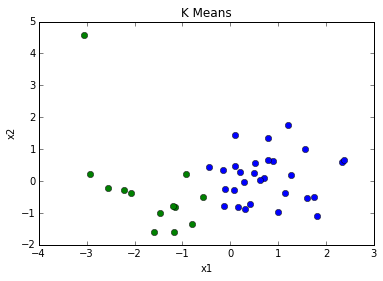

In [16]:
import scipy.cluster.vq as CL
import matplotlib.pyplot as pp

#number of centroids
numK = 2

centroids, sq = CL.kmeans(np.array(transformed1), numK)

#compute distance of each sample to the centroids
dist = [(np.sum((np.array(transformed1) - np.array([centroids[i]]))**2,1)) for i in range(numK)]

#assign sample to closest cluster
class_assigned = [(np.where(np.transpose(dist)[i]==min(np.transpose(dist)[i])))[0][0] for i in range(transformed1.shape[0])]
clustered = [[transformed1[i] for i, clu in enumerate(class_assigned) if clu == k*1.] for k in range(numK)]

# plotting each class
for k in range(numK):
    pp.plot(np.transpose(clustered[k])[0], np.transpose(clustered[k])[1],'o')

#### CHANGE THESE LABELS TO MATCH YOUR DATA
pp.title('K Means')
pp.xlabel('x1')
pp.ylabel('x2')
pp.show()

In [16]:
""" Clustered Points """
cluster0 = np.array(clustered[0])
cluster1 = np.array(clustered[1])
cluster2 = np.array(clustered[2])